## Multiple Linear Regression

Does college pay off? We'll use some of the latest data from the US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a> to answer that question. 

In this notebook, you'll use R to create a more advanced type of model: multiple regression models. In doing so, you'll be able to isolate which factors (controlling for other variables) that make certain colleges worth the price of admission.

In [4]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code.
# This command downloads a useful package of R commands
suppressPackageStartupMessages({
    library(dplyr)
    library(ggplot2)
    library(ggformula)
})

### The Dataset (`four_year_colleges.csv`)

In this notebook, we'll be using the `four_year_colleges.csv` file, which only includes schools that offer four-year bachelors degrees and/or higher graduate degrees. Institutions that offer only associates degrees or profession certificates, such as community colleges and trade schools, have been excluded. Community colleges and trade schools often have different goals (e.g. facilitating transfers, direct career education) than institutions that offer four-year bachelors degrees. By comparing four-year colleges only to other four-year colleges, we'll have clearer analyses and conclusions.

This dataset is a subset of the US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a>, which shows various metrics of cost, enrollment, size, student debt, student demographics, and alumni success. The database describes almost every University, college, community college, trade school, and certificate program in the United States. The data is current as of the 2020-2021 school year.

#### Variables
- `OPEID` - Official ID number for college/institution
- `name` - Name of college/institution
- `city` - City in which college/institution is located
- `state` - State in which college/institution is located
- `region` - US geographic region in which the college/institution is located
- `median_debt` - The median student loan amount, upon entering repayment, in thousands of dollars
- `default_rate` - Percent of school's borrowers in default on student loans (from recent cohorts). Includes students who graduate, transfer, or dropout.
- `highest_degree`: Highest degree awarded at institution (values: `Certificate`, `Associates`,`Bachelors`,`Graduate`)
- `ownership`: Control of institution (values: `Public`,`Private nonprofit`,`Private for-profit`)
- `locale`: Locale surrounding institution (values: `Large City`,`Small City`,`Suburb`,`Town`,`Rural`)
- `hbcu`: Indicator for historically black college and university (values: `No`,`Yes`)
- `admit_rate`: Percent of applicants offered admission
- `SAT_avg`: Average equivalent SAT score of admitted students
- `online_only`: Indicator for whether college only provides distance (online) classes (values: `No`,`Yes`)
- `enrollment`: Number of undergraduate or certificate-seeking students enrolled
- `net_price`: Average cost of attendance (includes tuition, books, & living expenses) minus average financial aid, in thousands of dollars
- `avg_cost`: Average cost of attendance (includes tuition, books, & living expenses), in thousands of dollars
- `net_tuition`: Net tuition revenue (tuition minus average discounts and allowances) per student, in thousands of dollars
- `ed_spending_per_student`: Instructional expenditures per student, in thousands of dollars
- `avg_faculty_salary`: Average faculty salary, in thousands of dollars
- `pct_PELL`: Percent of undegraduates who received a [PELL grant](https://www.benefits.gov/benefit/417)
- `pct_fed_loan`: Percent of undergraduates who received a federal student loan
- `grad_rate`: Graduation rate, given 150% of normal time (e.g. graduate within 6 years for a 4-year degree)
- `pct_firstgen`: Share of students that are first generation in their family to attend college
- `med_fam_income`: Median income of students' families, in thousands of dollars
- `med_alum_earnings`: Median earnings of students working and no longer enrolled 10 years after entry, in thousands of dollars

Detailed description and technical notes can be found <a href="https://docs.google.com/spreadsheets/d/1fa_Bd3_eYEmxvKPcu3hK2Dgazdk-9bkeJwONMS6u43Q/edit?usp=sharing">here</a>

### 1.0 - Motivating multiple linear regression

To begin, let's download our data. Our full dataset is included in a file named `colleges.csv`, which we're retrieving from a github repository. The command below downloads the data from the file and stores it into an R dataframe object called `dat`.

In [5]:
dat <- read.csv('https://raw.githubusercontent.com/mahmoudharding/slrp/main/data/four_year_colleges.csv')

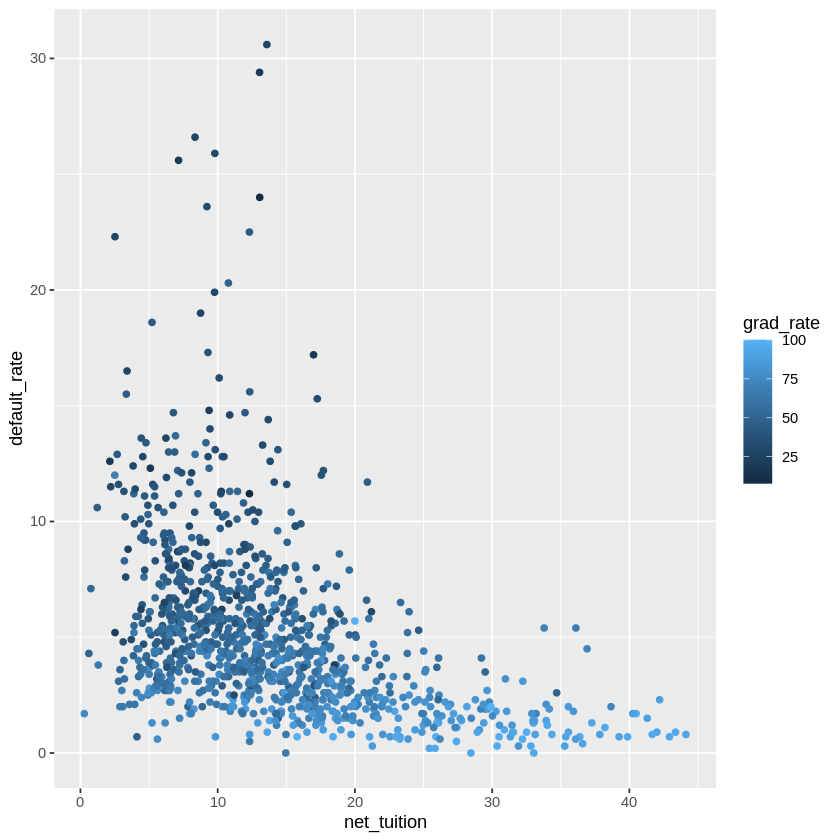

### 2.0 - Fitting and interpreting a multiple linear regression model

So far, we have only been working with simple linear regressions: models that use one predictor variable (`net_tuition`) to predict the outcome variables (`default_rate`). If we'd like to use multiple predictor variables at once in order to model our outcome, we can use a technique called **multiple regression**.

For example, imagine we want to use **both** `net_tuition` ($x_{1}$) and `grad_rate` ($x_{2}$) to predict `default_rate` ($y$).

### 3.0 - Making your own multiple regression models